# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dftrain= pd.read_csv('train dataset.csv')
dftrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
dftrain["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
42h 45m      1
32h 20m      1
36h 25m      1
33h 45m      1
4h 10m       1
Name: Duration, Length: 368, dtype: int64

In [5]:
dftrain.dropna(inplace = True)

In [6]:
dftrain.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
dftrain["Journey_day"] = pd.to_datetime(dftrain.Date_of_Journey, format="%d/%m/%Y").dt.day

In [8]:
dftrain["Journey_month"] = pd.to_datetime(dftrain["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [9]:
dftrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
dftrain.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [11]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
dftrain["Dep_hour"] = pd.to_datetime(dftrain["Dep_Time"]).dt.hour

# Extracting Minutes
dftrain["Dep_min"] = pd.to_datetime(dftrain["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
dftrain.drop(["Dep_Time"], axis = 1, inplace = True)

In [12]:
dftrain.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [13]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
dftrain["Arrival_hour"] = pd.to_datetime(dftrain.Arrival_Time).dt.hour

# Extracting Minutes
dftrain["Arrival_min"] = pd.to_datetime(dftrain.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
dftrain.drop(["Arrival_Time"], axis = 1, inplace = True)
dftrain.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [14]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(dftrain["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [15]:
# Adding duration_hours and duration_mins list to train_data dataframe

dftrain["Duration_hours"] = duration_hours
dftrain["Duration_mins"] = duration_mins

In [16]:
dftrain.drop(["Duration"], axis = 1, inplace = True)
dftrain.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [17]:
#Handling Categorical Data
dftrain["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

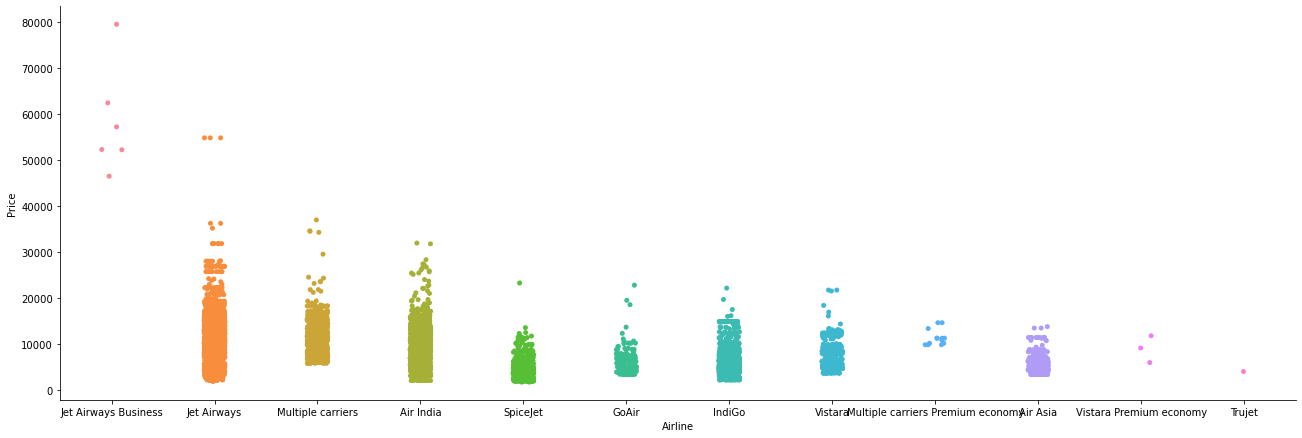

In [18]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = dftrain.sort_values("Price", ascending = False), height = 6,aspect=3)
plt.show()

In [19]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = dftrain[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [20]:
dftrain["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

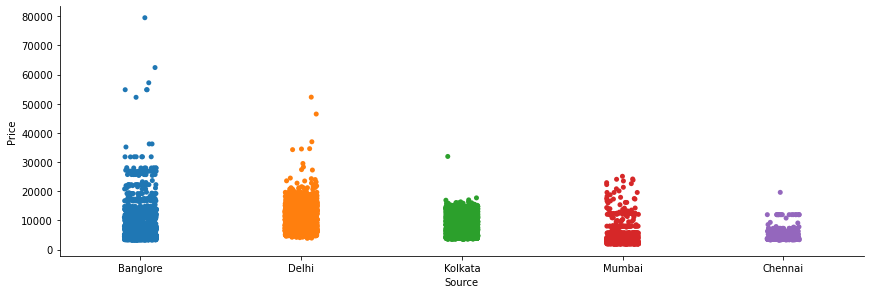

In [21]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = dftrain.sort_values("Price", ascending = False), height = 4, aspect = 3)
plt.show()

In [22]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = dftrain[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
dftrain["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = dftrain[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
dftrain["Route"]

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [26]:
 #Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other
dftrain.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [27]:
dftrain["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
dftrain.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [29]:
dftrain.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [30]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
dftrain = pd.concat([dftrain, Airline, Source, Destination], axis = 1)

In [31]:
dftrain.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [32]:
dftrain.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [33]:
dftrain.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [34]:
dftrain.shape

(10682, 30)

# Test data

In [35]:
dftest= pd.read_csv('test data.csv')
dftest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [36]:
# Preprocessing
print("Test data Info")
print(dftest.info())
print()
print()
print("Null values :")
dftest.dropna(inplace = True)
print(dftest.isnull().sum())

Test data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [37]:
# Date_of_Journey
dftest["Journey_day"] = pd.to_datetime(dftest.Date_of_Journey, format="%d/%m/%Y").dt.day
dftest["Journey_month"] = pd.to_datetime(dftest["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dftest.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [38]:
dftest.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [39]:
# Dep_Time
dftest["Dep_hour"] = pd.to_datetime(dftest["Dep_Time"]).dt.hour
dftest["Dep_min"] = pd.to_datetime(dftest["Dep_Time"]).dt.minute
dftest.drop(["Dep_Time"], axis = 1, inplace = True)

In [40]:
dftest.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [41]:
# Arrival_Time
dftest["Arrival_hour"] = pd.to_datetime(dftest.Arrival_Time).dt.hour
dftest["Arrival_min"] = pd.to_datetime(dftest.Arrival_Time).dt.minute
dftest.drop(["Arrival_Time"], axis = 1, inplace = True)

In [42]:
dftest.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [43]:
# Duration
duration = list(dftest["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [44]:
# Adding Duration column to test set
dftest["Duration_hours"] = duration_hours
dftest["Duration_mins"] = duration_mins
dftest.drop(["Duration"], axis = 1, inplace = True)

In [45]:
dftest.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [46]:
# Categorical data
print("Airline")
print(dftest["Airline"].value_counts())
Airline = pd.get_dummies(dftest["Airline"], drop_first= True)
print()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64



In [47]:
dftest.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [48]:
print("Source")
print(dftest["Source"].value_counts())
Source = pd.get_dummies(dftest["Source"], drop_first= True)
print()
dftest.head()

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [49]:
print("Destination")
print(dftest["Destination"].value_counts())
Destination = pd.get_dummies(dftest["Destination"], drop_first = True)

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [50]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other
dftest.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [51]:
# Replacing Total_Stops
dftest.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dftest.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [52]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
dftest = pd.concat([dftest, Airline, Source, Destination], axis = 1)
dftest.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [53]:
dftest.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
dftest.shape

(2671, 28)

In [55]:
dftrain.shape

(10682, 30)

In [56]:
dftrain.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [57]:
x=dftrain.drop("Price",axis=1)
y=dftrain[["Price"]]

# Checking Correlation

In [58]:
dftrain.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


<AxesSubplot:>

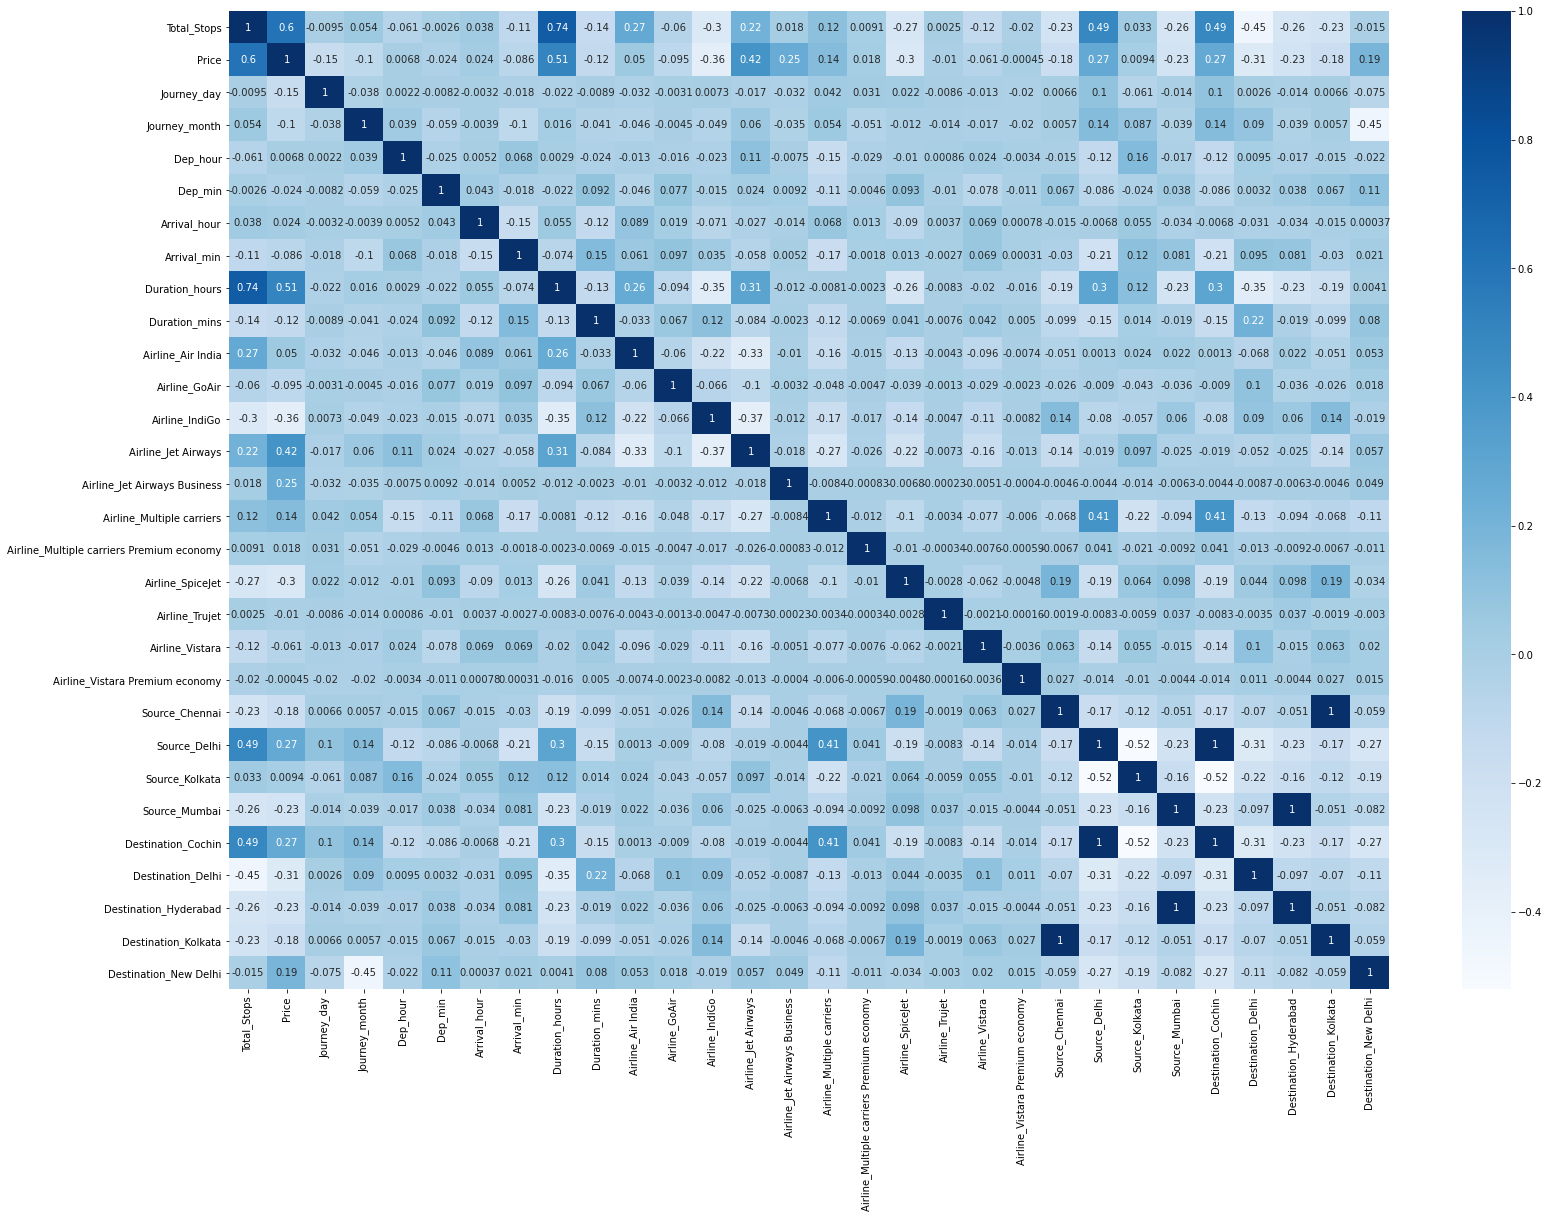

In [64]:
plt.figure(figsize=(26,18))
sns.heatmap(dftrain.corr(), annot=True, cmap='Blues')

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [67]:
max_accuracy=0
max_randomstate=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc=r2_score(y_test, predlr)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomstate=i
print("Maximum r2 score is ",max_accuracy," on Random_state ",max_randomstate)

Maximum r2 score is  0.6722157976607817  on Random_state  57


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=57)

# Random Forest Regressor

In [69]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test, predrf))
print('Mean Squared Error:',mean_squared_error(y_test, predrf))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, predrf)))

R2_Score: 0.8147322550341058
Mean absolute error: 1186.850205930047
Mean Squared Error: 4091270.8249357613
Root Mean Square Error: 2022.6890084577415


# Gradient Boosting Regressor

In [70]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print('R2_Score:',r2_score(y_test,predgbr))
print('Mean absolute error:',mean_absolute_error(y_test, predgbr))
print('Mean Squared Error:',mean_squared_error(y_test, predgbr))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, predgbr)))

R2_Score: 0.8059621678818165
Mean absolute error: 1495.9955654889668
Mean Squared Error: 4284940.811607812
Root Mean Square Error: 2070.00985785281


# Extra Trees Regressor

In [71]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predetr=etr.predict(x_test)
print('R2_Score:',r2_score(y_test,predetr))
print('Mean absolute error:',mean_absolute_error(y_test, predetr))
print('Mean Squared Error:',mean_squared_error(y_test, predetr))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, predetr)))

R2_Score: 0.8040183608862876
Mean absolute error: 1243.1088892528464
Mean Squared Error: 4327865.935198955
Root Mean Square Error: 2080.352358423677


# Decision Tree Regressor

In [72]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=etr.predict(x_test)
print('R2_Score:',r2_score(y_test,preddtr))
print('Mean absolute error:',mean_absolute_error(y_test, preddtr))
print('Mean Squared Error:',mean_squared_error(y_test, preddtr))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, preddtr)))

R2_Score: 0.8040183608862876
Mean absolute error: 1243.1088892528464
Mean Squared Error: 4327865.935198955
Root Mean Square Error: 2080.352358423677


# Cross Validation Score

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
# cv score for Random Forest Regressor
print('Random Forest Regressor:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for SVC
print('Extra Trees Regressor:',cross_val_score(etr,x,y,cv=5).mean())

#cv score for Decision Tree Classifier
print('Decision Tree Regressor:',cross_val_score(dtr,x,y,cv=5).mean())

#cv score for Gradient Boosting Classifier
print('Gradient Boosting Regressor:',cross_val_score(gbr,x,y,cv=5).mean())

Random Forest Regressor: 0.813371780212495
Extra Trees Regressor: 0.7854250648450931
Decision Tree Regressor: 0.7069573909746067
Gradient Boosting Regressor: 0.768764727689553


After cross validation, Random Forest Regressor gives the best accuracy score

# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [77]:
Price = RandomForestRegressor(criterion='mse', max_depth=8, n_estimators=100)
Price.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:',mean_squared_error(y_test, pred))

R2_Score: 81.97033665004302
RMSE value: 1995.368057331152
MAE: 1437.477778647285
MSE: 3981493.684217495


# Saving the model in pickle format

In [79]:
import pickle
filename='Flight Price Pridiction.pkl'
pickle.dump(rf,open(filename,"wb"))

# Conclusion

In [80]:
model=pickle.load(open('Flight Price Pridiction.pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

0.8147322550341058


In [81]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
Predicted,7740.15,7580.69,3915.38,14249.28,8477.4,7424.17,8445.81,10815.202857,13606.716667,3597.1,...,6465.72,7913.11,3851.769238,13514.315,6387.96,6350.1375,14245.84,3860.857333,5300.42,5626.51
Original,7740.15,7580.69,3915.38,14249.28,8477.4,7424.17,8445.81,10815.202857,13606.716667,3597.1,...,6465.72,7913.11,3851.769238,13514.315,6387.96,6350.1375,14245.84,3860.857333,5300.42,5626.51
